In [ ]:
"""
Copyright (c) Meta Platforms, Inc. and affiliates.
All rights reserved.
This source code is licensed under the license found in the
LICENSE file in the root directory of this source tree.
"""
from recipe.analysis.run import Runs

paths = {
    "dfs": {
        10: "PATH_TO_LOGS",
        20: "PATH_TO_LOGS",
        30: "PATH_TO_LOGS",
    },
    "astar": {
        10: "PATH_TO_LOGS",
        20: "PATH_TO_LOGS",
        30: "PATH_TO_LOGS",
    },
}

datasets = {
    "dfs": {
        n: print(n) or Runs.load_dataset(path=path) for n, path in paths["dfs"].items()
    },
    "astar": {
        n: print(n) or Runs.load_dataset(path=path) for n, path in paths["astar"].items()
    },  
}

In [37]:
path_lengths = {}
for maze_type in datasets:
    path_lengths[maze_type] = pl = {}
    for n, dataset in datasets[maze_type].items():
        pl[n] = []
        for batch in dataset.val_dataloader()[0]:
            length = batch["prediction_mask"].sum(1)
            if maze_type == "astar":
                length = (length - 2) / 3 # bos, eos (-2) and path x y is one node repr (/3)
            elif maze_type == "dfs":
                length = length - 2
            pl[n].extend(length.tolist())

In [ ]:
path_lengths["astar"].keys()

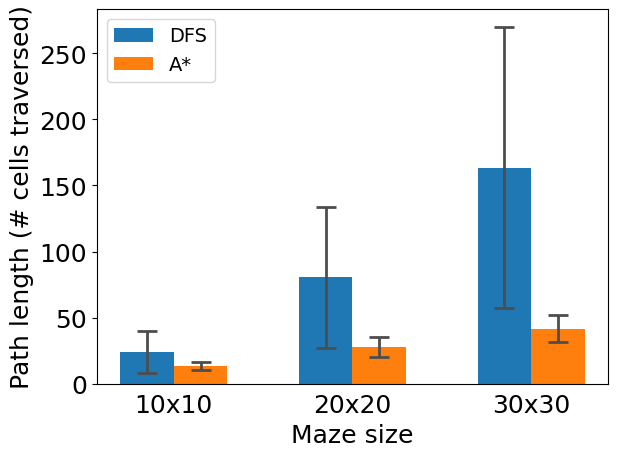

In [99]:
# make a bar plot of the path lengths barh
import matplotlib.pyplot as plt
import numpy as np
# make text larger
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 14})
path_length_means = {maze_type: [np.mean(pl) for pl in path_lengths[maze_type].values()] for maze_type in path_lengths}
path_length_stds = {maze_type: [np.std(pl) for pl in path_lengths[maze_type].values()] for maze_type in path_lengths}

#barh with error bars
n = len(path_length_means["dfs"])
bar_width = 3
index = 10 + np.arange(n) * 10 - bar_width / 2
error_config = {'ecolor': '0.3', 'capsize': 7, 'capthick': 2, 'elinewidth': 2, 'alpha': 1, 'linewidth': 2}
bar1 = ax.bar(index, path_length_means["dfs"], bar_width, yerr=path_length_stds["dfs"], label='DFS', error_kw=error_config)
bar2 = ax.bar(index + bar_width, path_length_means["astar"], bar_width, yerr=path_length_stds["astar"], label='A*', error_kw=error_config)
ax.set_xlabel('Maze size')
ax.set_ylabel('Path length (# cells traversed)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f"{n}x{n}" for n in path_lengths["dfs"].keys()])
# make ticks invisible
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.legend()
plt.tight_layout()
plt.savefig("figures/path_lengths.pdf")

